<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/the_Cauch_%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приближённое решение задачи Коши для ОДУ

1. Реализовать каждый метод в виде функций, принимающих от пользователя все необходимые данные для вычисления результата:
  - `f` — функция, правая часть ОДУ $\frac{dy}{dx} = f(y, x)$
  - `y0` — начальное значение в момент t_start
  - `N` — количество узлов сетки
  - `x_end` — конец интегрирования
  - `x_start` — начальное время (по умолчанию 0)

  Функции должны возвращать кортеж `(x_arr, y_arr)`, где:
  - `x_arr` — сетка, на которой вычислено решение
  - `y_arr` — массив приближенных значений решения в этих точках



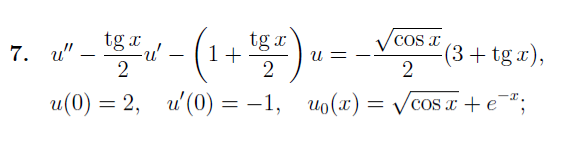

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Система ОДУ
def f_system(x, y):
    y1, y2 = y
    tg = np.tan(x)
    sqrt_cos = np.sqrt(np.cos(x)) if np.cos(x) >= 0 else 0
    dy1 = y2
    dy2 = (tg / 2) * y2 + (1 + tg / 2) * y1 - sqrt_cos / 2 * (3 + tg)
    return np.array([dy1, dy2])

# Точное решение
def exact_solution(x):
    return np.sqrt(np.cos(x)) + np.exp(-x)

# Методы численного решения
def euler_method(f, y0, N, x_end, x_start=0):
    h = (x_end - x_start) / N
    x = np.linspace(x_start, x_end, N + 1)
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0
    for i in range(N):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    return x, y[:, 0]

def runge_kutta_4(f, y0, N, x_end, x_start=0):
    h = (x_end - x_start) / N
    x = np.linspace(x_start, x_end, N + 1)
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0
    for i in range(N):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return x, y[:, 0]

def adams_bashforth_3(f, y0, N, x_end, x_start=0):
    h = (x_end - x_start) / N
    x = np.linspace(x_start, x_end, N + 1)
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0

    # Первые три точки считаем методом Рунге-Кутты
    for i in range(3):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    for i in range(3, N):
        f0 = f(x[i], y[i])
        f1 = f(x[i - 1], y[i - 1])
        f2 = f(x[i - 2], y[i - 2])
        y[i + 1] = y[i] + h * (23 * f0 - 16 * f1 + 5 * f2) / 12

    return x, y[:, 0]

# Начальные условия
y0 = np.array([2, -1])
x_start = 0
x_end = 1

2. Построить графики численных решений ОДУ, найденных разными методами при шаге сетки $\Delta x = 0.05$. Начало расчёта — точка $x = 0$. Графики совместить на одном рисунке.


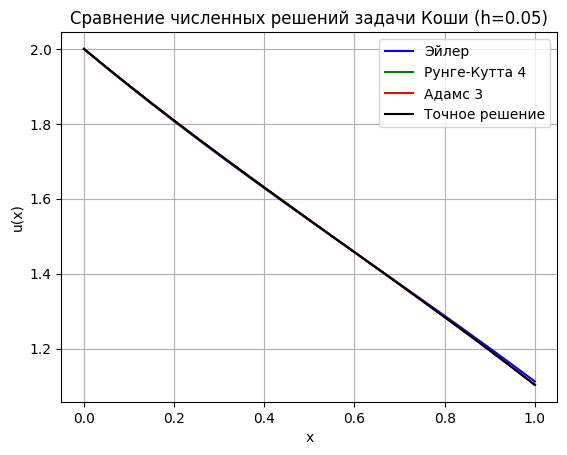

In [ ]:
# 1. Графики решений при h = 0.05
h = 0.05
N = int((x_end - x_start) / h)

x_euler, y_euler = euler_method(f_system, y0, N, x_end)
x_rk4, y_rk4 = runge_kutta_4(f_system, y0, N, x_end)
x_adams, y_adams = adams_bashforth_3(f_system, y0, N, x_end)
y_exact = exact_solution(x_rk4)


plt.plot(x_euler, y_euler, color='blue', label='Эйлер')
plt.plot(x_rk4, y_rk4, color='green', label='Рунге-Кутта 4')
plt.plot(x_adams, y_adams, color='red', label='Адамс 3')
plt.plot(x_rk4, y_exact, color='black', label='Точное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнение численных решений задачи Коши (h=0.05)')
plt.legend()
plt.grid(True)
plt.show()


3. Для каждого метода постройте график зафисимости погрешности приближенного решения от шага интегрирования (подберите пределы изменения шага самостоятельно, продемонстрируйте нецелесообразность бесконечного уменьшения шага). Графики совместите на одном рисунке. Используйте логарифмический масштаб. Добавьте легенду и подпишите оси графика.


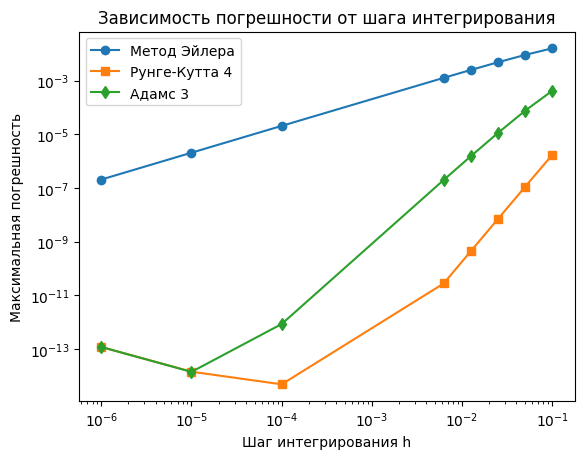

In [ ]:
# 2. Графики погрешностей в зависимости от шага
hs = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.0001, 0.00001, 0.000001]
errors_euler = []
errors_rk4 = []
errors_adams = []

for h in hs:
    N = int((x_end - x_start) / h)

    # Метод Эйлера
    x, y = euler_method(f_system, y0, N, x_end)
    y_exact = exact_solution(x)
    error = np.max(np.abs(y - y_exact))
    errors_euler.append(error)

    # Метод Рунге-Кутты 4
    x, y = runge_kutta_4(f_system, y0, N, x_end)
    y_exact = exact_solution(x)
    error = np.max(np.abs(y - y_exact))
    errors_rk4.append(error)

    # Метод Адамса 3
    x, y = adams_bashforth_3(f_system, y0, N, x_end)
    y_exact = exact_solution(x)
    error = np.max(np.abs(y - y_exact))
    errors_adams.append(error)

plt.loglog(hs, errors_euler, 'o-', label='Метод Эйлера')
plt.loglog(hs, errors_rk4, 's-', label='Метод Рунге-Кутты')
plt.loglog(hs, errors_adams, 'd-', label='Метод Адамса')
plt.xlabel('Шаг интегрирования h')
plt.ylabel('Максимальная погрешность')
plt.title('Зависимость погрешности от шага интегрирования')
plt.legend()
plt.show()


4. Для каждого метода найти ***оценку*** погрешности при шаге $ \Delta x = 0.05 $, используя правило Рунге. Сравнить с точным значением погрешности


In [ ]:
# 4. Оценка погрешности по правилу Рунге для h = 0.05
h = 0.05
N = int((x_end - x_start) / h)

# Метод Эйлера (порядок 1)
x, y_h = euler_method(f_system, y0, N, x_end)
x, y_h2 = euler_method(f_system, y0, 2*N, x_end)
error_estimate_euler = np.abs(y_h[-1] - y_h2[-1]) / (2**1 - 1)
exact_error_euler = np.abs(y_h[-1] - exact_solution(x_end))

# Метод Рунге-Кутты 4 (порядок 4)
x, y_h = runge_kutta_4(f_system, y0, N, x_end)
x, y_h2 = runge_kutta_4(f_system, y0, 2*N, x_end)
error_estimate_rk4 = np.abs(y_h[-1] - y_h2[-1]) / (2**4 - 1)
exact_error_rk4 = np.abs(y_h[-1] - exact_solution(x_end))

# Метод Адамса 3 (порядок 3)
x, y_h = adams_bashforth_3(f_system, y0, N, x_end)
x, y_h2 = adams_bashforth_3(f_system, y0, 2*N, x_end)
error_estimate_adams = np.abs(y_h[-1] - y_h2[-1]) / (2**3 - 1)
exact_error_adams = np.abs(y_h[-1] - exact_solution(x_end))

print("Оценки погрешностей при h=0.05:")
print(f"Метод Эйлера: оценка по Рунге = {error_estimate_euler:.2e}, точная погрешность = {exact_error_euler:.2e}")
print(f"Рунге-Кутта 4: оценка по Рунге = {error_estimate_rk4:.2e}, точная погрешность = {exact_error_rk4:.2e}")
print(f"Адамс 3: оценка по Рунге = {error_estimate_adams:.2e}, точная погрешность = {exact_error_adams:.2e}")

Оценки погрешностей при h=0.05:
Метод Эйлера: оценка по Рунге = 4.30e-03, точная погрешность = 9.20e-03
Рунге-Кутта 4: оценка по Рунге = 6.98e-09, точная погрешность = 1.12e-07
Адамс 3: оценка по Рунге = 9.32e-06, точная погрешность = 7.66e-05
